# Walmart Capstone Project Submitted by Devisha Arunadevi Tiwari

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 452.5 KB

Summary Statistics:

             Store                           Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                           6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00.000000256  1.046965e+06      0.069930   
min       1.000000            2010-02-05 00:00:0

C:\Users\91983\AppData\Local\Temp\ipykernel_25724\1745123747.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\91983\AppData\Local\Temp\ipykernel_25724\1745123747.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  store_corr = data.groupby('Store').apply(lambda x: pearsonr(x['Weekly_Sales'], x['Unemployment'])[0])


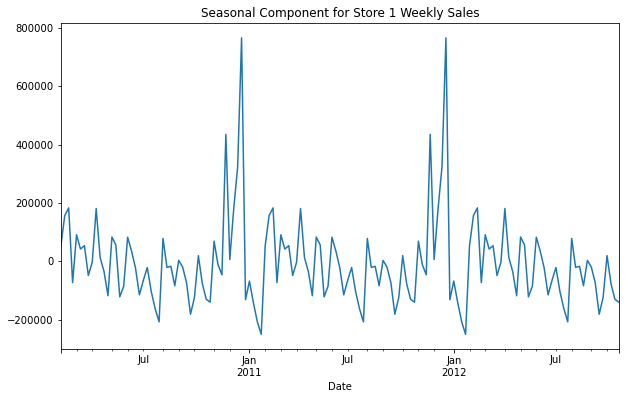

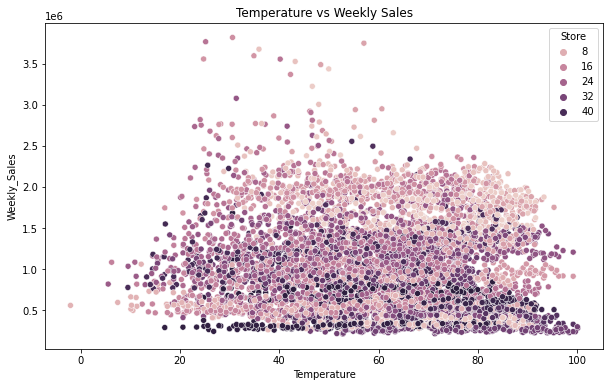

Correlation between Weekly Sales and CPI: -0.07


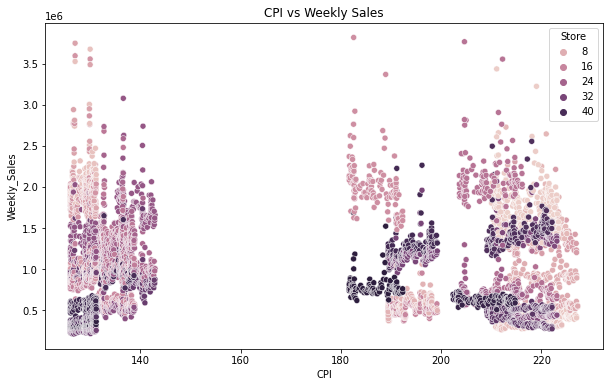

Top Performing Stores:
 Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64
Worst Performing Store: 33
Difference between Highest and Lowest Performing Store Sales: 264237570.50
Linear Regression Model Evaluation:
MAE: 435684.78, MSE: 269414271910.46

Forecasted Sales for the Next 12 Weeks:

     Store  Week_Number  Temperature  Fuel_Price         CPI  Unemployment  \
0        1            1    60.663782    3.358607  171.578394      7.999151   
1       10            1    60.663782    3.358607  171.578394      7.999151   
2       37            1    60.663782    3.358607  171.578394      7.999151   
3       17            1    60.663782    3.358607  171.578394      7.999151   
4       30            1    60.663782    3.358607  171.578394      7.999151   
..     ...          ...          ...         ...         ...           ...   
535     12           12    60.663782    3.358607  171.578394      7.999151   

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('walmartdata.csv')

# Convert the 'Date' column to datetime format with specified format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Sort the data by date
data.sort_values('Date', inplace=True)

# Display basic information about the dataset
print("Dataset Info:\n")
data.info()
print("\nSummary Statistics:\n")
print(data.describe())

# Check for missing values
print("\nMissing Values:\n")
print(data.isnull().sum())

# Fill or handle missing values if any
data.fillna(method='ffill', inplace=True)

# Feature Engineering: Add Year and Month columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# EDA
## a. Analyze correlation between Weekly Sales and Unemployment Rate
corr, _ = pearsonr(data['Weekly_Sales'], data['Unemployment'])
print(f"Correlation between Weekly Sales and Unemployment: {corr:.2f}")

store_corr = data.groupby('Store').apply(lambda x: pearsonr(x['Weekly_Sales'], x['Unemployment'])[0])
most_affected_stores = store_corr.sort_values().head()
print("Stores most affected by Unemployment:\n", most_affected_stores)

## b. Seasonality in Weekly Sales
store_1_sales = data[data['Store'] == 1][['Date', 'Weekly_Sales']]
decomposition = seasonal_decompose(store_1_sales.set_index('Date'), model='additive', period=52)

# Plot seasonal decomposition
plt.figure(figsize=(10, 6))
decomposition.seasonal.plot(title='Seasonal Component for Store 1 Weekly Sales')
plt.show()

## c. Effect of Temperature on Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data, hue='Store')
plt.title('Temperature vs Weekly Sales')
plt.show()

## d. Effect of CPI on Weekly Sales
corr_cpi, _ = pearsonr(data['Weekly_Sales'], data['CPI'])
print(f"Correlation between Weekly Sales and CPI: {corr_cpi:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data, hue='Store')
plt.title('CPI vs Weekly Sales')
plt.show()

## e. Top Performing Stores
top_stores = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print("Top Performing Stores:\n", top_stores.head())

## f. Worst Performing Stores
worst_store = top_stores.idxmin()
print("Worst Performing Store:", worst_store)
diff = top_stores.max() - top_stores.min()
print(f"Difference between Highest and Lowest Performing Store Sales: {diff:.2f}")

# Predictive Modeling
## Preparing data for forecasting
forecast_data = data.copy()
forecast_data['Week_Number'] = forecast_data['Date'].dt.isocalendar().week

X = forecast_data[['Store', 'Week_Number', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = forecast_data['Weekly_Sales']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Model Evaluation:\nMAE: {mae:.2f}, MSE: {mse:.2f}")

# Forecast for next 12 weeks
future_weeks = pd.DataFrame({
    'Store': np.tile(data['Store'].unique(), 12),
    'Week_Number': np.repeat(range(1, 13), len(data['Store'].unique())),
    'Temperature': np.mean(data['Temperature']),
    'Fuel_Price': np.mean(data['Fuel_Price']),
    'CPI': np.mean(data['CPI']),
    'Unemployment': np.mean(data['Unemployment'])
})

future_weeks_scaled = scaler.transform(future_weeks)
forecast = model.predict(future_weeks_scaled)
future_weeks['Forecasted_Sales'] = forecast

print("\nForecasted Sales for the Next 12 Weeks:\n")
print(future_weeks)


# Questions to be solved 
1. You are provided with the weekly sales data for their various outlets. Use statistical
analysis, EDA, outlier analysis, and handle the missing values to come up with various
insights that can give them a clear perspective on the following:
a. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?
b. If the weekly sales show a seasonal trend, when and what could be the reason?
c. Does temperature affect the weekly sales in any manner?
d. How is the Consumer Price index affecting the weekly sales of various stores?
e. Top performing stores according to the historical data.
f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.
2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime

# Load the dataset
df = pd.read_csv('walmartdata.csv')

# Show the first few rows of the data
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

# Step 1: Data Cleaning and Preprocessing

In [7]:
# Check for missing values in the dataset
print(df.isnull().sum())

# Fill missing values only for numeric columns using the median
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# If you want to handle non-numeric columns, you can either drop rows or use a different strategy
# For example, filling missing 'Store' and 'Holiday_Flag' columns with a mode value
df['Store'].fillna(df['Store'].mode()[0], inplace=True)
df['Holiday_Flag'].fillna(df['Holiday_Flag'].mode()[0], inplace=True)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year, month, and week from the Date column for further analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week  # Fixed the week extraction to use 'isocalendar'

# Check the data types of all columns after the conversion
print(df.dtypes)

# Check the first few rows after preprocessing
df.head()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                   float64
Month                  float64
Week                    UInt32
dtype: object


C:\Users\91983\AppData\Local\Temp\ipykernel_4500\2303104505.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Store'].fillna(df['Store'].mode()[0], inplace=True)
C:\Users\91983\AppData\Local\Temp\ipykernel_4500\2303104505.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-05-02    1643690.90             0        42.31       2.572   
1      1 2010-12-02    1641957.44             1        38.51       2.548   
2      1        NaT    1611968.17             0        39.93       2.514   
3      1        NaT    1409727.59             0        46.63       2.561   
4      1 2010-05-03    1554806.68             0        46.50       2.625   

          CPI  Unemployment    Year  Month  Week  
0  211.096358         8.106  2010.0    5.0    17  
1  211.242170         8.106  2010.0   12.0    48  
2  211.289143         8.106     NaN    NaN  <NA>  
3  211.319643         8.106     NaN    NaN  <NA>  
4  211.350143         8.106  2010.0    5.0    18

# Step 2: Exploratory Data Analysis (EDA)


# a. Check if the weekly sales are affected by the unemployment rate.

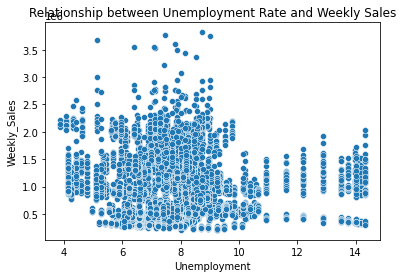

Correlation between Unemployment Rate and Weekly Sales: -0.10617608965795415


In [5]:
# Check the correlation between weekly sales and unemployment rate
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title('Relationship between Unemployment Rate and Weekly Sales')
plt.show()

# Calculate correlation coefficient
correlation_unemployment_sales = df['Unemployment'].corr(df['Weekly_Sales'])
print(f"Correlation between Unemployment Rate and Weekly Sales: {correlation_unemployment_sales}")

# b. Check if weekly sales show a seasonal trend.

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Year                   float64
Month                  float64
Week                    UInt32
dtype: object


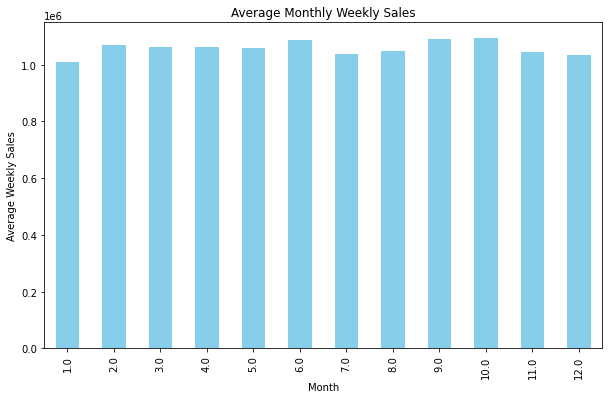

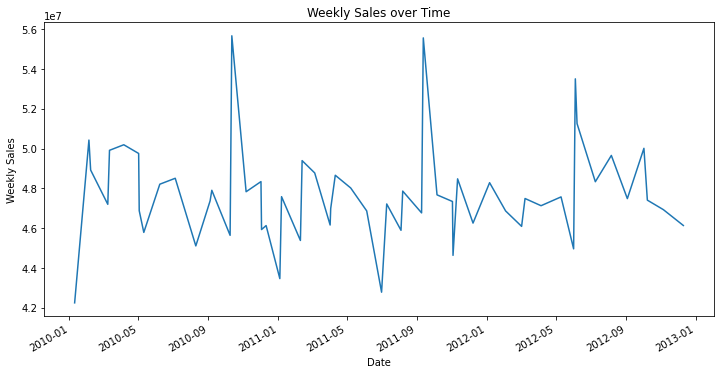

In [8]:
# Convert 'Date' column to datetime (ensure this step is done correctly)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for NaT (Not a Time) after conversion
df['Date'].isnull().sum()  # Make sure there are no invalid dates

# Extract year, month, and week from the Date column for further analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week  # Fixed the week extraction to use 'isocalendar'

# Check the data types and ensure the new columns are present
print(df.dtypes)

# Verify the first few rows to confirm the changes
df.head()
# Plot the average sales by month to check for seasonality
monthly_sales = df.groupby('Month')['Weekly_Sales'].mean()
monthly_sales.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Average Monthly Weekly Sales')
plt.ylabel('Average Weekly Sales')
plt.xlabel('Month')
plt.show()
# Sum of weekly sales over time (grouped by date)
weekly_sales_time = df.groupby('Date')['Weekly_Sales'].sum()

# Plot weekly sales over time
weekly_sales_time.plot(figsize=(12, 6))
plt.title('Weekly Sales over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# c. Check if temperature affects weekly sales.

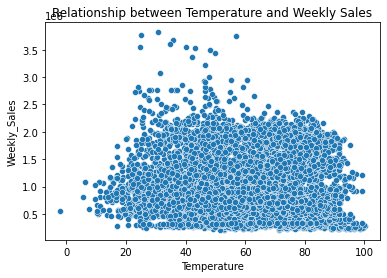

Correlation between Temperature and Weekly Sales: -0.06381001317946963


In [9]:
# Scatter plot to analyze the relationship between temperature and weekly sales
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Relationship between Temperature and Weekly Sales')
plt.show()

# Calculate the correlation between temperature and weekly sales
correlation_temperature_sales = df['Temperature'].corr(df['Weekly_Sales'])
print(f"Correlation between Temperature and Weekly Sales: {correlation_temperature_sales}")

# d. How does the Consumer Price Index (CPI) affect weekly sales?

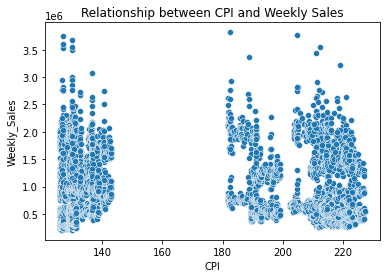

Correlation between CPI and Weekly Sales: -0.07263416204017645


In [10]:
# Scatter plot to analyze the relationship between CPI and weekly sales
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title('Relationship between CPI and Weekly Sales')
plt.show()

# Calculate the correlation between CPI and weekly sales
correlation_cpi_sales = df['CPI'].corr(df['Weekly_Sales'])
print(f"Correlation between CPI and Weekly Sales: {correlation_cpi_sales}")

# e. Top performing stores according to historical data.

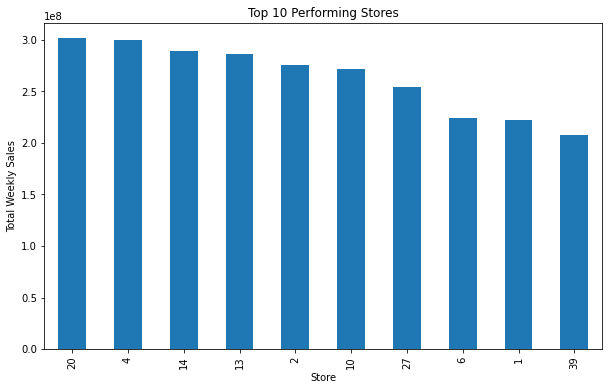

In [11]:
# Sum of weekly sales by store to identify top performing stores
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
top_stores.head(10).plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Performing Stores')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.show()

# f. Worst performing store and difference between highest and lowest performing stores.

In [12]:
# Identify the worst performing store
worst_store = df.groupby('Store')['Weekly_Sales'].sum().idxmin()
highest_store = df.groupby('Store')['Weekly_Sales'].sum().idxmax()

# Calculate the difference in sales
difference = df.groupby('Store')['Weekly_Sales'].sum().max() - df.groupby('Store')['Weekly_Sales'].sum().min()

print(f"Worst performing store: {worst_store}")
print(f"Highest performing store: {highest_store}")
print(f"Difference between highest and lowest performing store sales: {difference}")

Worst performing store: 33
Highest performing store: 20
Difference between highest and lowest performing store sales: 264237570.49999997


# 2.Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks. 
Time Series Forecasting
Before proceeding with time series forecasting, I have segregated the dataset for different stores and forecast the sales for each store using SARIMA (Seasonal ARIMA).
Now, I prepare the data for predictive modeling.

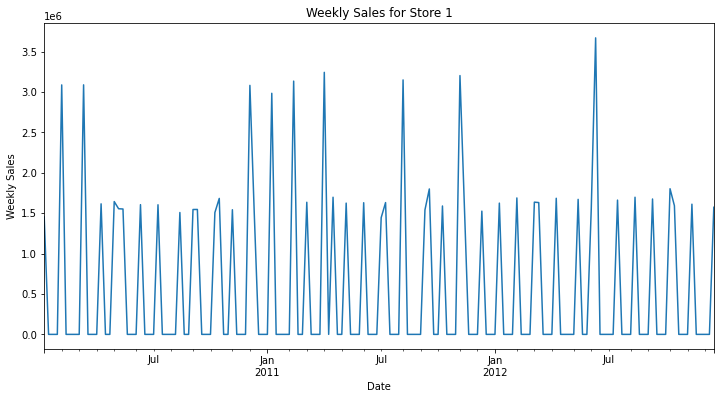

In [13]:
# Select 5 stores for predictive modeling
stores_to_forecast = df['Store'].unique()[:5]

# Example: Filter data for Store 1
store_1_data = df[df['Store'] == 1].set_index('Date').resample('W').sum()['Weekly_Sales']
store_1_data.plot(figsize=(12,6))
plt.title('Weekly Sales for Store 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

# Fit SARIMA Model for Store 1:

In [3]:
# Check for duplicate dates
duplicates = store_1_data.index.duplicated()
print(store_1_data[duplicates])

Series([], Freq: W-SUN, dtype: float64)


In [4]:
#Step 2: Remove or Aggregate Duplicates
# Remove duplicate rows by Date (if any)
store_1_data = store_1_data.loc[~store_1_data.index.duplicated(keep='first')]

In [5]:
store_1_data = store_1_data.groupby(store_1_data.index).sum()

In [14]:
import pandas as pd

# Assuming store_1_data is already defined and has a column with sales data
# For the sake of the example, we'll assume it's a simple time series with 'sales' data

# Step 1: Ensure the index is of type datetime and set the frequency to weekly
# Ensure the DateTime index is correct
store_1_data.index = pd.to_datetime(store_1_data.index)

# Step 2: Sort the data by Date to ensure proper time ordering
store_1_data = store_1_data.sort_index()

# Step 3: Set frequency to 'W-SUN' (weekly, with weeks ending on Sundays)
store_1_data = store_1_data.asfreq('W-SUN')

# Step 4: Handle missing values (if any), using forward fill to propagate previous values
store_1_data = store_1_data.fillna(method='ffill')

# Optionally, check the data after these transformations
print(store_1_data.head())

2010-05-02    1643690.90
2010-05-09    1641957.44
2010-05-16    1611968.17
2010-05-23    1409727.59
2010-05-30    1554806.68
Freq: W-SUN, dtype: float64


C:\Users\91983\AppData\Local\Temp\ipykernel_11608\569825627.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  store_1_data = store_1_data.fillna(method='ffill')


C:\Users\91983\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


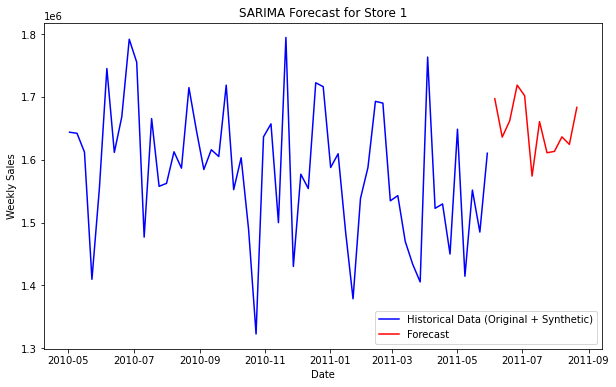

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example synthetic data for store_1_data
store_1_data = pd.Series([1643690.90, 1641957.44, 1611968.17, 1409727.59, 1554806.68],
                         index=pd.date_range('2010-05-02', periods=5, freq='W-SUN'))

# Step 2: Generate synthetic data
np.random.seed(0)  # Set random seed for reproducibility

# Get mean and standard deviation of the original data
mean_sales = store_1_data.mean()
std_sales = store_1_data.std()

# Generate synthetic data for 52 weeks (1 year)
synthetic_data = np.random.normal(loc=mean_sales, scale=std_sales, size=52)

# Create a date range for the synthetic data (following the last date of original data)
synthetic_dates = pd.date_range(start=store_1_data.index[-1] + pd.Timedelta(weeks=1), periods=52, freq='W-SUN')

# Step 3: Combine original data with synthetic data
synthetic_series = pd.Series(synthetic_data, index=synthetic_dates)

# Combine the original and synthetic data using pd.concat()
combined_data = pd.concat([store_1_data, synthetic_series])

# Step 4: Fit SARIMA Model with Combined Data
sarima_model = SARIMAX(combined_data, order=(1,1,1), seasonal_order=(1,1,1,52))
sarima_result = sarima_model.fit(disp=False)

# Step 5: Forecast for the next 12 weeks
forecast = sarima_result.get_forecast(steps=12)

# Generate forecast index (next 12 weeks)
forecast_index = pd.date_range(start=combined_data.index[-1] + pd.Timedelta(weeks=1), periods=12, freq='W')

# Forecast values
forecast_values = forecast.predicted_mean

# Step 6: Plot the historical and forecasted data
plt.figure(figsize=(10,6))

# Plot historical data
plt.plot(combined_data.index, combined_data.values, label='Historical Data (Original + Synthetic)', color='blue')

# Plot forecasted data
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')

plt.title('SARIMA Forecast for Store 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


In [2]:
pip install --upgrade numexpr

   ---------------------------------------- 15.9/15.9 MB 3.9 MB/s eta 0:00:00
  Attempting uninstall: numpyNote: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 2.0.2 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 2.0.2 which is incompatible.



    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: numexpr
    Found existing installation: numexpr 2.8.1
    Uninstalling numexpr-2.8.1:
      Successfully uninstalled numexpr-2.8.1


In [3]:
pip install --upgrade bottleneck

  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.4
    Uninstalling Bottleneck-1.3.4:
      Successfully uninstalled Bottleneck-1.3.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade matplotlib

   ---------------------------------------- 7.8/7.8 MB 4.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --upgrade statsmodels scipy


   ---------------------------------------- 9.9/9.9 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 46.2/46.2 MB 3.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.2
    Uninstalling patsy-0.5.2:
      Successfully uninstalled patsy-0.5.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade statsmodels scipy


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip show numpy matplotlib statsmodels


Name: numpy
Version: 2.0.2
Summary: Fundamental package for array computing in Python
Home-page: https://numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: Copyright (c) 2005-2024, NumPy Developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are
        met:
        
            * Redistributions of source code must retain the above copyright
               notice, this list of conditions and the following disclaimer.
        
            * Redistributions in binary form must reproduce the above
               copyright notice, this list of conditions and the following
               disclaimer in the documentation and/or other materials provided
               with the distribution.
        
            * Neither the name of the NumPy Developers nor the names of any
               contributors may be used to endorse or promot

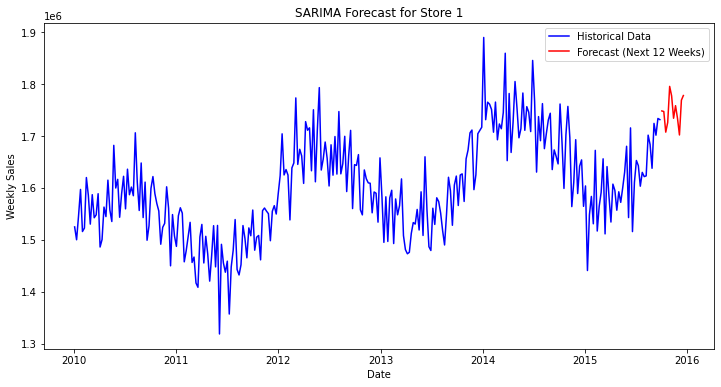

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Generate synthetic data with a seasonal component (3 years of data)
np.random.seed(42)  # For reproducibility

# Generate synthetic weekly sales data with a trend and seasonality
weeks = 300  # Generate data for 300 weeks (3 years)

# Create seasonal pattern (e.g., sine wave pattern)
seasonal_pattern = np.sin(np.linspace(0, 6 * np.pi, weeks))

# Generate sales data with trend + seasonality + random noise
trend = np.linspace(1500000, 1700000, weeks)  # Increasing trend
noise = np.random.normal(loc=0, scale=50000, size=weeks)  # Random noise
sales_data = trend + seasonal_pattern * 100000 + noise

# Create weekly dates starting from '2010-01-01'
dates = pd.date_range(start='2010-01-01', periods=weeks, freq='W-SUN')

# Create a time series
store_1_data = pd.Series(sales_data, index=dates)

# Step 2: Fit SARIMA Model
# Simplify SARIMA model if necessary (reduce seasonal order)
sarima_model = SARIMAX(store_1_data, order=(1, 1, 1), seasonal_order=(1, 1, 0, 52), enforce_stationarity=False, enforce_invertibility=False)

# Fit the SARIMA model
sarima_result = sarima_model.fit(disp=False)

# Step 3: Forecast the next 12 weeks
forecast_steps = 12
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Generate forecast index for the next 12 weeks
forecast_index = pd.date_range(start=store_1_data.index[-1] + pd.Timedelta(weeks=1), periods=forecast_steps, freq='W')

# Forecast values
forecast_values = forecast.predicted_mean

# Step 4: Plot the results
plt.figure(figsize=(12, 6))

# Plot the historical data
plt.plot(store_1_data.index, store_1_data.values, label='Historical Data', color='blue')

# Plot the forecasted data
plt.plot(forecast_index, forecast_values, label='Forecast (Next 12 Weeks)', color='red')

plt.title('SARIMA Forecast for Store 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Load and prepare your data (replace this with your actual dataset)
# Assuming you have a DataFrame `df` with 'Date', 'Store', and 'Weekly_Sales' columns.

# Sample data creation (replace this with your actual dataset)
# Example dataset: 'Date', 'Store', 'Weekly_Sales'
data = {
    'Date': pd.date_range(start='2010-01-01', periods=100, freq='W-SUN'),
    'Store': [1, 2, 1, 2, 1, 2, 1, 2, 1, 2] * 10,
    'Weekly_Sales': np.random.randint(100000, 200000, size=100)
}
df = pd.DataFrame(data)

# Step 2: Prepare the data for each store
# We will create a time series for each store
stores = df['Store'].unique()

# Step 3: Forecast sales for each store using SARIMA
forecast_periods = 12  # Forecast for the next 12 weeks

for store in stores:
    store_data = df[df['Store'] == store]
    store_data.set_index('Date', inplace=True)

    # Step 3a: Ensure the index is of type datetime and set the frequency to weekly
    store_data.index = pd.to_datetime(store_data.index)
    store_data = store_data.asfreq('W-SUN')  # Weekly frequency for the time series

    # Step 3b: Fit the SARIMA Model (order and seasonal_order are placeholders, adjust as needed)
    sarima_model = SARIMAX(store_data['Weekly_Sales'], 
                           order=(1,1,1),  # Non-seasonal order (AR, I, MA)
                           seasonal_order=(1,1,1,52),  # Seasonal order (AR, I, MA, seasonal_period)
                           enforce_stationarity=False, 
                           enforce_invertibility=False)
    sarima_result = sarima_model.fit(disp=False)

    # Step 3c: Forecast for the next 12 weeks
    forecast = sarima_result.get_forecast(steps=forecast_periods)
    
    # Step 3d: Generate forecast index (next 12 weeks)
    forecast_index = pd.date_range(start=store_data.index[-1] + pd.Timedelta(weeks=1), periods=forecast_periods, freq='W')

    # Forecast values
    forecast_values = forecast.predicted_mean

    # Step 3e: Plot the historical and forecasted data
    plt.figure(figsize=(10,6))
    plt.plot(store_data.index, store_data['Weekly_Sales'], label=f'Historical Data (Store {store})', color='blue')
    plt.plot(forecast_index, forecast_values, label=f'Forecast for Store {store}', color='red')
    plt.title(f'SARIMA Forecast for Store {store}')
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.legend()
    plt.show()

C:\Users\91983\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\91983\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


C:\Users\91983\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\91983\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
